In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Распределение у которого конечны первые четыре момента, а пятое — нет.
Его плотность: $$p_X=5x^{-6}I( x {\geq} 1 )$$

интеграл по плотности: $$\int_{0}^{+\infty} 5x^{-6} I( x {\geq} 1 ) dx = 1 $$
первый момент: $$\int_{0}^{+\infty} 5x^{-5} I( x {\geq} 1 ) dx = 5/4 $$
второй момент: $$\int_{0}^{+\infty} 5x^{-4} I( x {\geq} 1 ) dx = 5/3 $$
третий момент: $$\int_{0}^{+\infty} 5x^{-3} I( x {\geq} 1 ) dx = 5/2 $$
четвертый момент: $$\int_{0}^{+\infty} 5x^{-2} I( x {\geq} 1 ) dx = 5 $$
пятый момент: $$\int_{0}^{+\infty} 5x^{-1} I( x {\geq} 1 ) dx = \infty $$

### Генерируем выборку из собственного распределения

In [136]:
N = 10**4

In [137]:
class my_distribution(sps.rv_continuous):
    def _pdf(self, x):
        return 5 * x ** (-6) 

func = my_function(a = 1, name='my')
sample = func.rvs(size = N)

### График плотности с точками выборки 

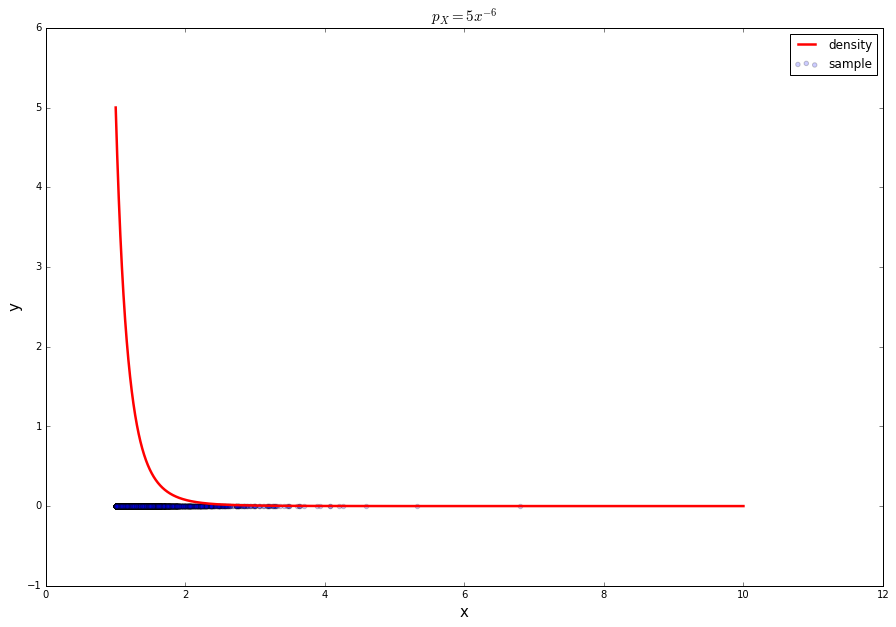

In [138]:
grid = np.linspace(1, 10, N) # задаем сетку для построения графика плотности
plt.figure(figsize=(15, 10))  
plt.scatter(sample, np.zeros(N) , alpha=0.2, label='sample') 
plt.plot(grid, my_distribution()._pdf(grid),linewidth=2.5, color='red', 
         label='density') 
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.title(r'$p_X=5x^{-6}$',fontsize = 15)
plt.legend() 
plt.show()

### Выборочная диспресия

In [139]:
n = np.arange(1, N+1)

In [140]:
S = (sample ** 2).cumsum() / n - (sample.cumsum() / n)**2

### Дисперсия

D = $\int_{0}^{+\infty} 5x^{-4} I( x {\geq} 1 ) dx  $ - $(\int_{0}^{+\infty} 5x^{-5} I( x {\geq} 1 ) dx) ^{2}$

In [141]:
D = 5/3. - (5/4.)**2

### График зависимости модуля разности оценки дисперсии и ее истинного значения от 𝑛.

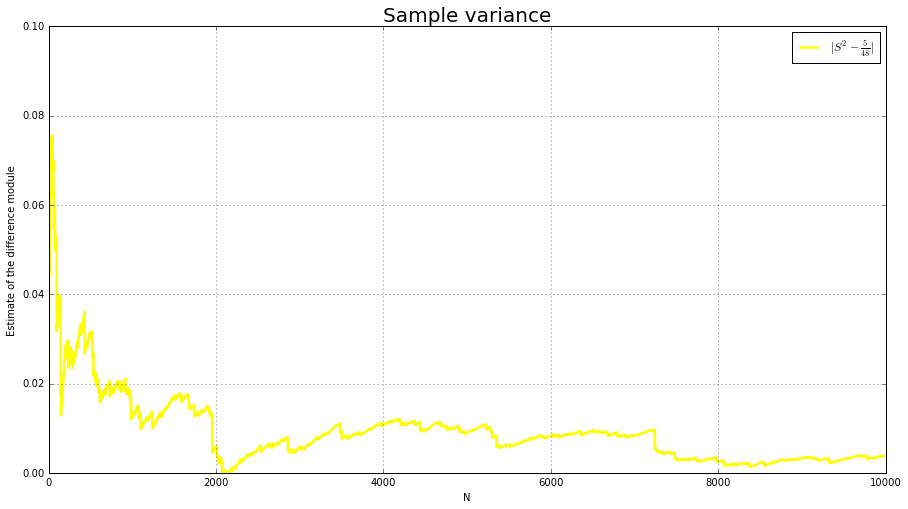

In [143]:
plt.figure(figsize=(15, 8))
plt.plot(n, abs(S - D), color= 'yellow', linewidth=2.5,
         label= r'$|S^{2} - \frac{5}{48}|$')  
plt.legend()
plt.xlim((1, N))  # размеры графика по горизонтальной оси 
plt.ylim((0, 0.1))  # размеры графика по вертикальной оси 
plt.xlabel('N')
plt.ylabel('Estimate of the difference module')
plt.title('Sample variance', fontsize = 20)
plt.grid()  # сетка

## Распределение Коши

In [2]:
N = 10**4

In [7]:
sample = sps.cauchy.rvs(size = N)

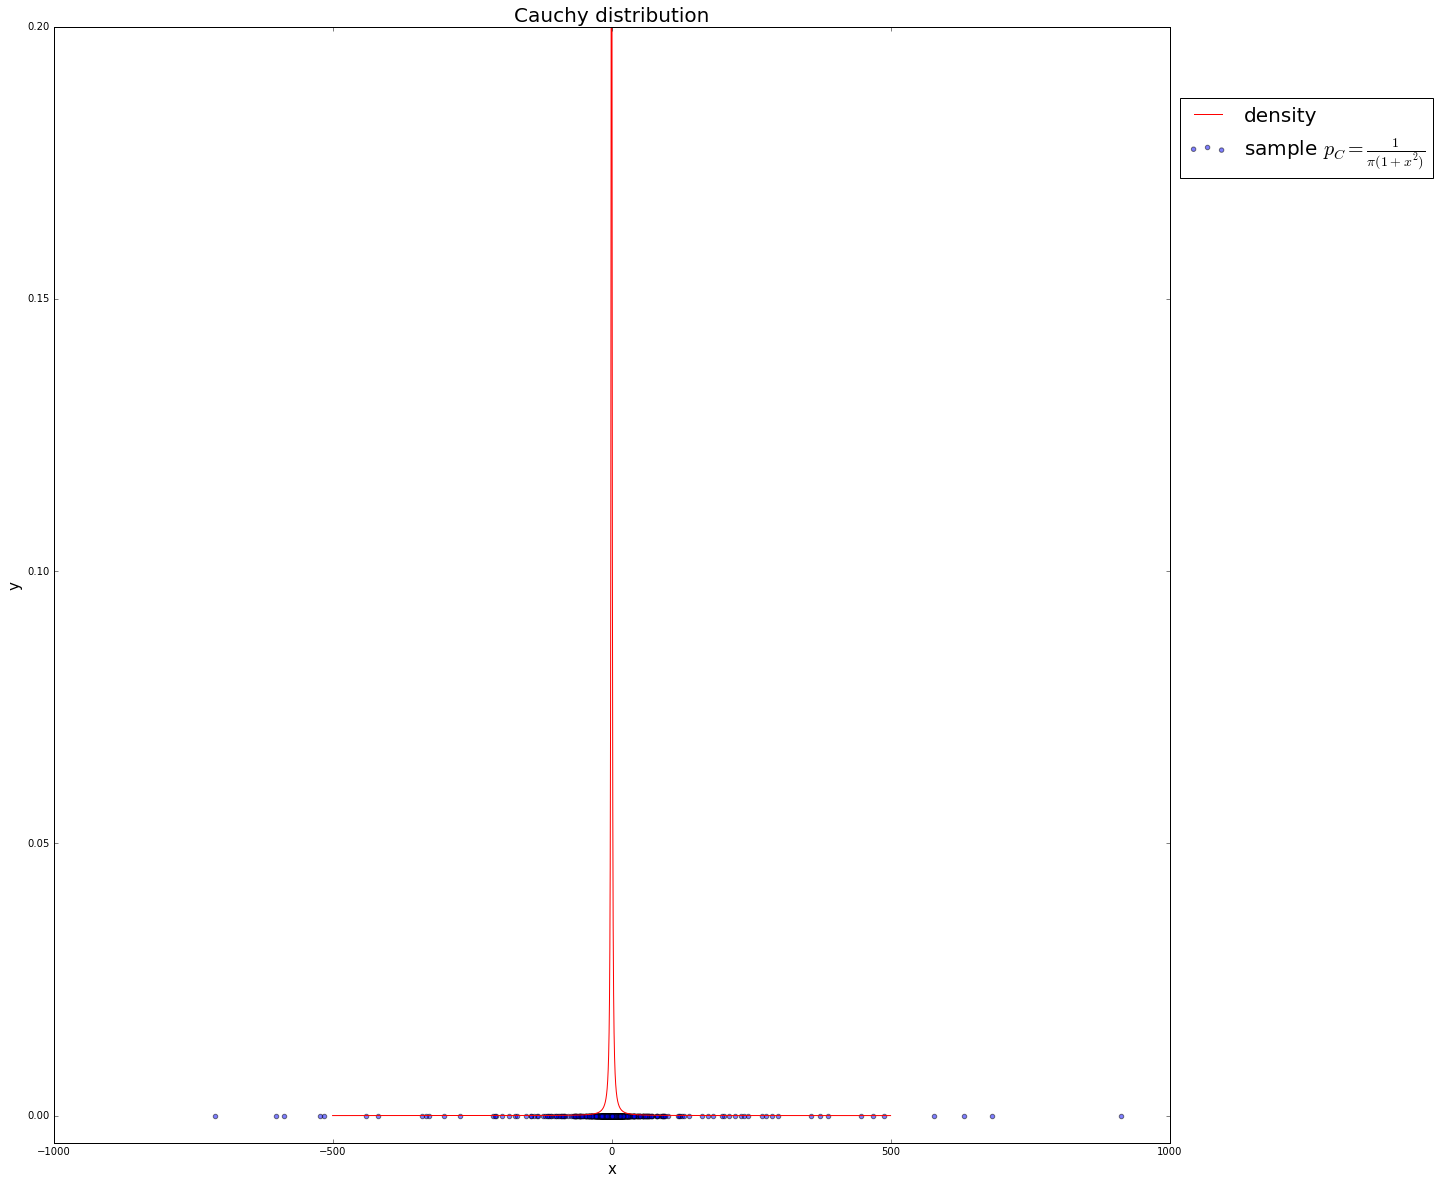

In [16]:
grid = np.linspace(-500, 500, N)  

plt.figure(figsize=(20, 20))
plt.xlim((-1000, 1000))  # размеры графика по горизонтальной оси 
plt.ylim((-0.005, 0.2))
plt.scatter(sample, np.zeros(N), alpha=0.5, label='sample ' r'$p_C=\frac{1}{\pi(1+x^2)}$') 
plt.plot(grid, sps.cauchy.pdf(grid), color='red', label='density')  
plt.legend(loc='center left', bbox_to_anchor=(1,0.9), fontsize = 20)
plt.xlabel('x', fontsize = 15)
plt.ylabel('y', fontsize = 15)
plt.title('Cauchy distribution', fontsize=20)
plt.show()

## Выборочная дисперсия

In [17]:
n = np.arange(1, N+1)

In [18]:
S = (sample ** 2).cumsum() / n - (sample.cumsum() / n)**2

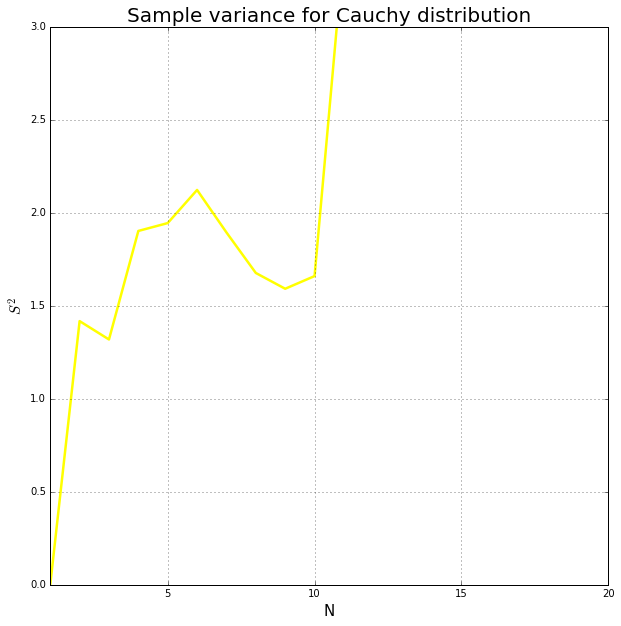

In [27]:
plt.figure(figsize=(10, 10))
plt.plot(n, S, color= 'yellow', linewidth=2.5)  
plt.xlim((1, 20))  # размеры графика по горизонтальной оси 
plt.ylim((0, 3))  # размеры графика по вертикальной оси 
plt.xlabel('N', fontsize = 15)
plt.ylabel('$S^{2}$', fontsize = 15)
plt.title('Sample variance for Cauchy distribution', fontsize = 20)
plt.grid()  # сетка
plt.show()